# Chapter 9 - MATLAB

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 9.1

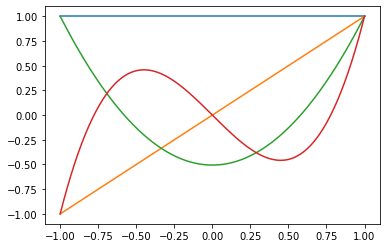

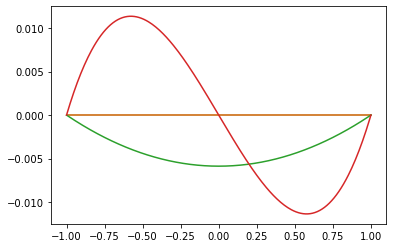

In [2]:
x = np.linspace(start = -1, stop = 1, num = 257)                # discretization of (-1,1)
A = np.column_stack(((x**0).T,(x**1).T,(x**2).T,(x**3).T))      # construct Vandermonde Matrix
Q,R = np.linalg.qr(A)                                           # Reduced QR Factorization

scale = Q[-1,:]
Q = Q @ np.diag(1/scale)
plt.plot(x,Q)
plt.show()

# Error Calculation

L = np.column_stack(((x**0).T,
                     (x**1).T,
                     (1.5*(x**2).T-.5),
                     (2.5*((x**3).T)-1.5*((x**1).T))))
E = Q-L
plt.plot(x,E)
plt.show()

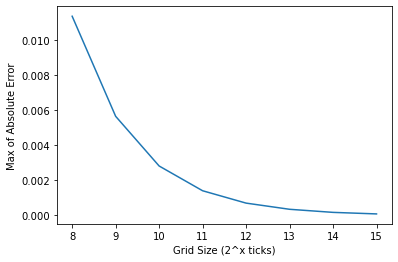

In [3]:
def max_error(power):
    x = np.linspace(start = -1, stop = 1, num = 2**power+1)         
    A = np.column_stack(((x**0).T,(x**1).T,(x**2).T,(x**3).T))    
    Q,R = np.linalg.qr(A) 

    scale = Q[-1,:]
    Q = Q @ np.diag(1/scale)

    L = np.column_stack(((x**0).T,
                         (x**1).T,
                         (1.5*(x**2).T-.5),
                         (2.5*((x**3).T)-1.5*((x**1).T))))
    return np.abs(Q-L).max()

x = range(8,16)
y = map(max_error, x)

plt.plot(list(x),list(y))
plt.xlabel("Grid Size (2^x ticks)")
plt.ylabel("Max of Absolute Error")
plt.show()

# Problem 9.3 

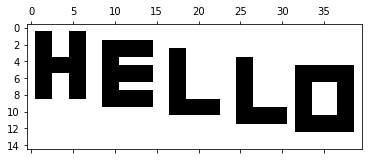

In [4]:
# Part (a) - Create "HELLO" matrix with 1's and 0's
A = np.zeros((15,40))

def vertical (matrix, row, col):
    matrix[row:row+8][:,col:col+2] = 1
    return matrix

def horizontal (matrix, row, col):
    matrix[row:row+2][:,col:col+6] = 1
    return matrix

# Letter H

A = vertical(A,1,1)
A = horizontal(A,4,1)
A = vertical(A,1,5)

# Letter E

A = vertical(A,2,9)
A = horizontal(A,2,9)
A = horizontal(A,5,9)
A = horizontal(A,8,9)

# Letter L

A = vertical(A,3,17)
A = horizontal(A,9,17)

# Letter L

A = vertical(A,4,25)
A = horizontal(A,10,25)

# Letter O

A = vertical(A,5,32)
A = horizontal(A,5,32)
A = horizontal(A,11,32)
A = vertical(A,5,37)

plt.spy(A)
plt.show()

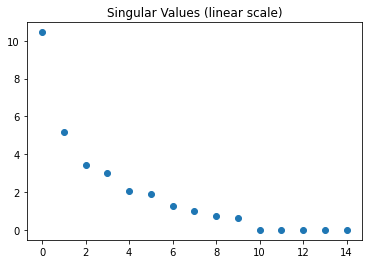

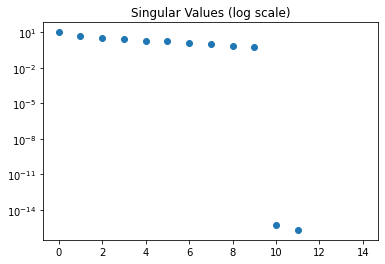

In [5]:
# Part (b) - SVD
U,S,V = np.linalg.svd(A)

plt.scatter(x=range(15),y=S)
plt.title("Singular Values (linear scale)")
plt.show()

plt.semilogy(S, marker = "o", linestyle = "None")
plt.title("Singular Values (log scale)")
plt.show()

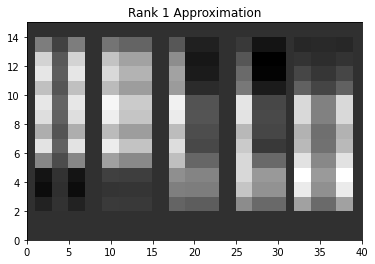

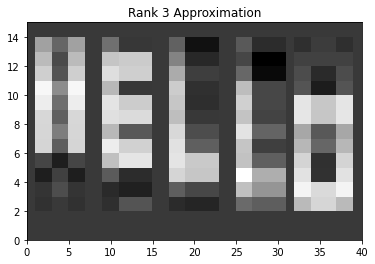

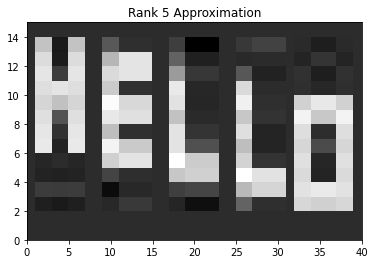

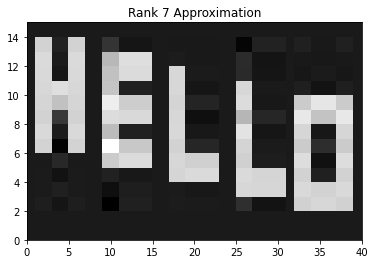

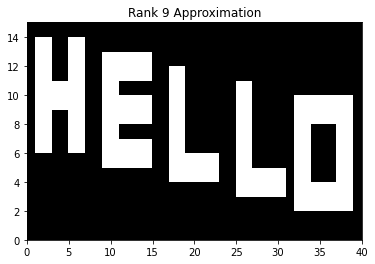

In [6]:
# Part (c) - Low Rank Approximations


def low_rank_approx(M,rank):
    U,S,V = np.linalg.svd(M)
    X = np.zeros(M.shape)
    for idx, (u,v) in enumerate(zip(U.T,V)):
        if idx > rank: return X
        X += S[idx]*np.outer(u,v)
    return X

# Rank 1 Approximation
X1 = low_rank_approx(A,1)
plt.pcolor(np.flipud(X1), cmap = 'gray')
plt.title("Rank 1 Approximation")
plt.show()
    
# Rank 3 Approximation
X3 = low_rank_approx(A,3)
plt.pcolor(np.flipud(X3), cmap = 'gray')
plt.title("Rank 3 Approximation")
plt.show()

# Rank 5 Approximation
X5 = low_rank_approx(A,5)
plt.pcolor(np.flipud(X5), cmap = 'gray')
plt.title("Rank 5 Approximation")
plt.show()

# Rank 7 Approximation
X7 = low_rank_approx(A,7)
plt.pcolor(np.flipud(X7), cmap = 'gray')
plt.title("Rank 7 Approximation")
plt.show()

# Rank 9 Approximation
X9 = low_rank_approx(A,9)
plt.pcolor(np.flipud(X9), cmap = 'gray')
plt.title("Rank 9 Approximation")
plt.show()